In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
# Load dataset from local file
df = pd.read_csv("car_data.csv")
print(df.head())

     Make     Model  Year  Mileage Fuel_Type Transmission  Owner  Price
0  Toyota   Corolla  2015    50000    Petrol       Manual      1  10000
1   Honda     Civic  2016    60000    Petrol    Automatic      2  12000
2    Ford     Focus  2014    55000    Diesel       Manual      1   9000
3     BMW  3 Series  2018    40000    Petrol    Automatic      2  22000
4    Audi        A4  2017    45000    Diesel    Automatic      3  25000


In [16]:
# Handle missing values
df.dropna(inplace=True)

In [17]:
# Drop non-relevant categorical features
if 'Model' in df.columns:
    df.drop(columns=['Model'], inplace=True)  # Drop 'Model' since it's too granular

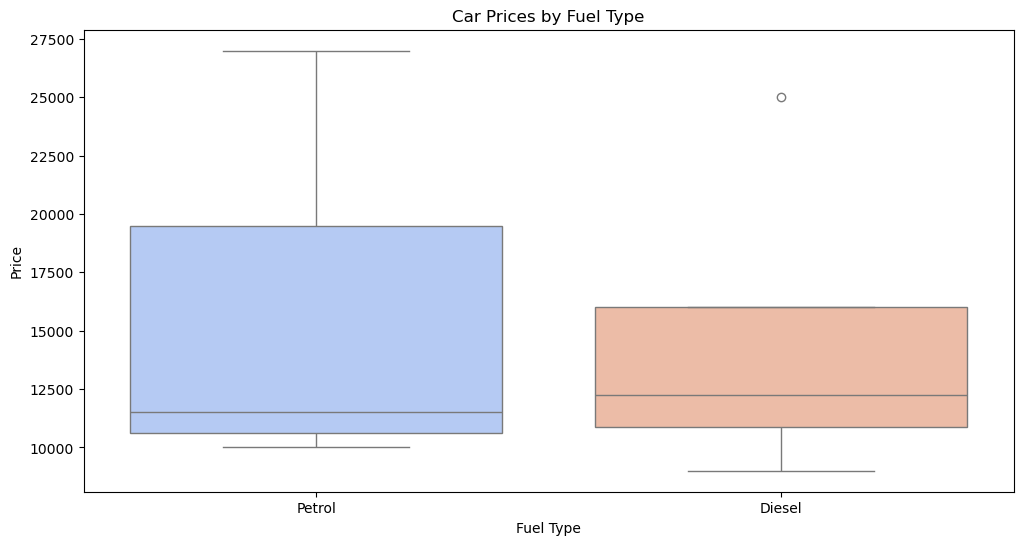

In [18]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df, hue='Fuel_Type', palette='coolwarm', legend=False)
plt.title("Car Prices by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

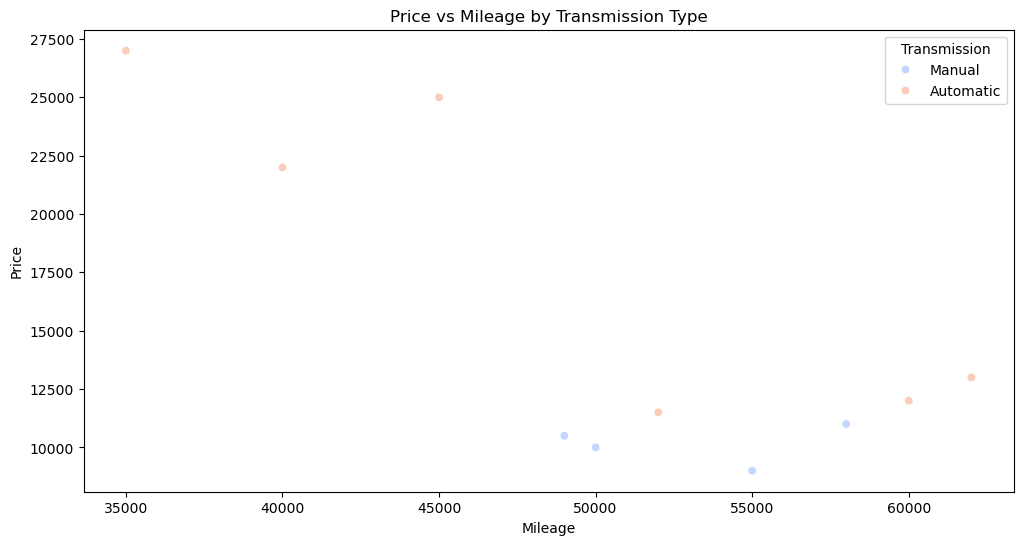

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Mileage', y='Price', hue='Transmission', data=df, palette='coolwarm', alpha=0.7)
plt.title("Price vs Mileage by Transmission Type")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(title="Transmission")
plt.show()

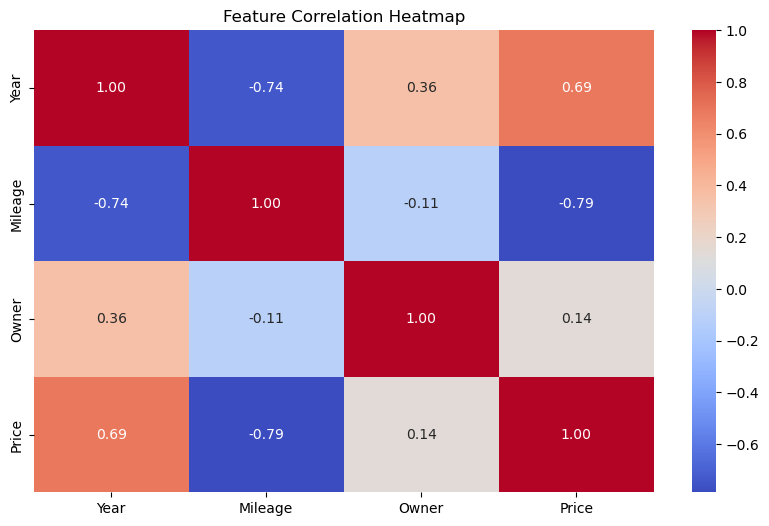

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [75]:
# Define features and target
X = df.drop(columns=['Price'])
y = df['Price']

In [77]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

In [79]:
# Data Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [81]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR()
}

In [85]:
# Train and evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }
    
    print(f"{name} Performance:")
    print(f"MAE: {results[name]['MAE']}")
    print(f"MSE: {results[name]['MSE']}")
    print(f"R2 Score: {results[name]['R2 Score']}\n")

Linear Regression Performance:
MAE: 3690.5196645664982
MSE: 17194800.482490238
R2 Score: -29.568534191093757

Random Forest Performance:
MAE: 1475.0
MSE: 2932525.0
R2 Score: -4.213377777777778

Support Vector Machine Performance:
MAE: 999.8150312567077
MSE: 1562472.2199819537
R2 Score: -1.777728391079029



<Figure size 1000x600 with 0 Axes>

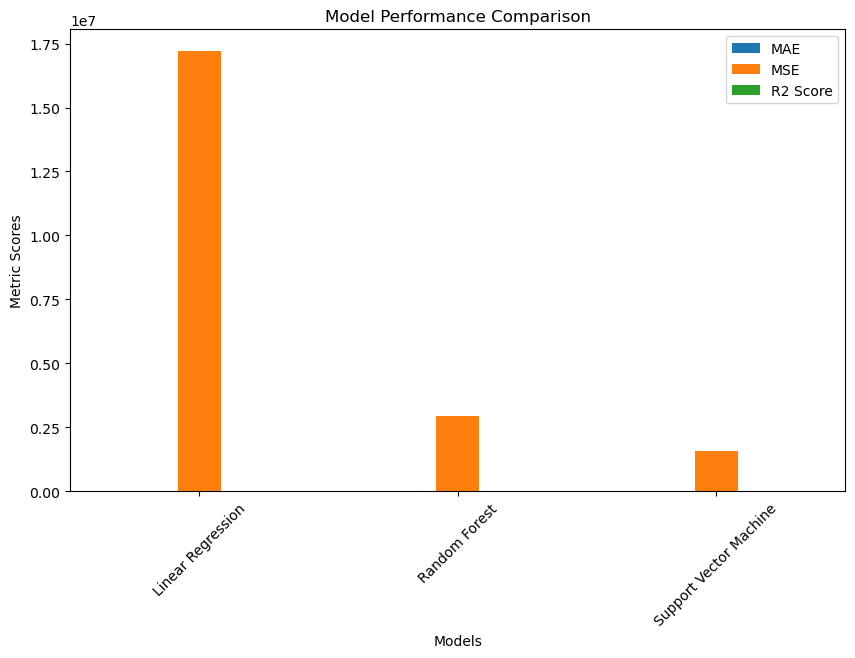

In [87]:
# Visualizing Model Performance
plt.figure(figsize=(10, 6))
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Metric Scores")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()